---
title: 'Chapter 3: Binary thresholding'
jupyter: python3
format:
  html:
    embed-resources: true
  pdf:
    documentclass: article
    toc: true
    fontsize: 12pt
    geometry:
      - top=1in
      - bottom=1in
      - left=1in
      - right=1in
      - heightrounded
---



# Introduction
In an image analysis pipeline it is desirable to extract the useful objects in
a grayscale image into the foreground and everything else in to the background.
Binary thresholding is the process of converting a grayscale image into a
binary image. 


# Converting a grayscale image to a binary image
Binary thresholding is done by picking a specific threshold value that is in
the range of the pixel intensities, i.e between 0 and 255 for a 8-bit image.
All the pixels in the image that have an intensity value below (or above) this
thresholds are set to 0 and the intensity values above this threshold are set
to 1. 

To binary threshold can be accomplished with the comparative operator `<` or
`>`, which returns a boolean values pixels meeting the condition.

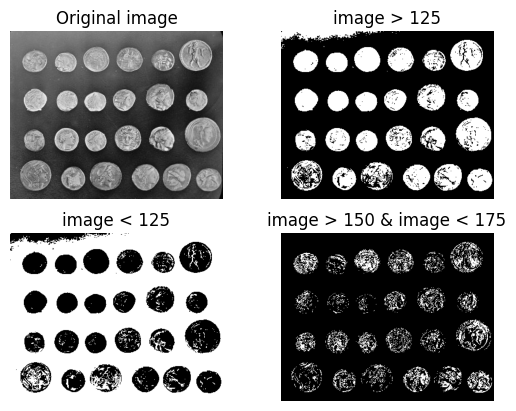

In [20]:
# Load the required libraries
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

# Load the coins data
img = ski.data.coins()

# Threshold above 125, all pixels above 125 becomes foreground
img_gt125 = img > 125

# Threshold below 125, all pixels below 100 becomes foreground
img_lt125 = img < 125

# Threshold in the range of 125 to 175
img_gt150_lt175 = (img > 150) & (img < 175)

# Plot the images
fig, ax =  plt.subplots(2, 2)
ax[0, 0].imshow(img, cmap = 'gray')
ax[0, 0].set_title('Original image')
ax[0, 1].imshow(img_gt125, cmap = 'gray')
ax[0, 1].set_title('image > 125')
ax[1, 0].imshow(img_lt125, cmap = 'gray')
ax[1, 0].set_title('image < 125')
ax[1, 1].imshow(img_gt150_lt175, cmap = 'gray')
ax[1, 1].set_title('image > 150 & image < 175')
for a in ax.flatten():
    a.set_axis_off()

The threshold value determines what is retained in the output binary image.
When a low threshold is pickled more pixels in the output image have a value of
1, and similarly, when ehan a higher threshold is picked fewer pixels are
retrained: 

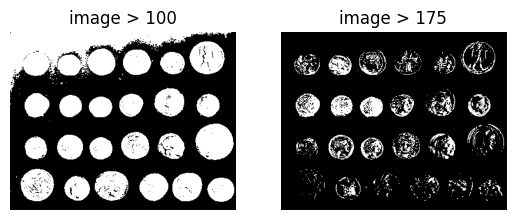

In [21]:
# Load the coins data
img = ski.data.coins()

# Threshold above 100
img_gt100 = img > 100

# Threshold above 175
img_gt175 = img > 175

# Plot the images
fig, ax =  plt.subplots(1, 2)
ax[0].imshow(img_gt100, cmap = 'gray')
ax[0].set_title('image > 100')
ax[1].imshow(img_gt175, cmap = 'gray')
ax[1].set_title('image > 175')
for a in ax:
    a.set_axis_off()

# Finding a binary threshold from the image histogram

Now that we have seen how to binary threshold an image and the impact of the
thresholds value, how can the pick out the optimal threshold value. Most often
is this accomplished from the intensity histogram of the input image. 

By looking at the histogram we can get an estimate of pixel intensities in the
image. Most importantly, since we are binary thresholding an image, we can get
a sense of the number of pixels that will be above or below a specific
cutoff.  For example, from the histogram below, we can easily see that picking
a value of 200 was too high and it retained too few pixels as expected and
picking a value of less than 100 is likely too low. A threshold of
approximately 125 looks optimal for our proposes. 

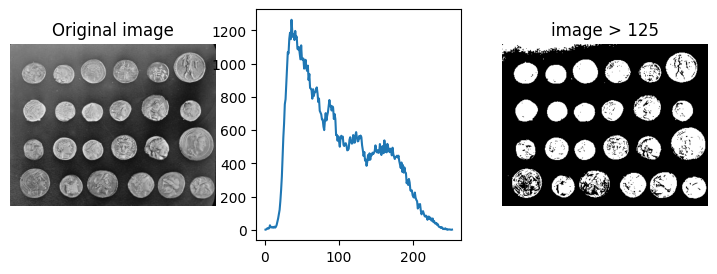

In [22]:
# Load the coins data
img = ski.data.coins()

# Get the histogram
hist, hist_centers = ski.exposure.histogram(img)

# Threshold above 125
img_gt125 = img > 125

# Plot the histogram
fig, ax =  plt.subplots(1, 3, figsize = (9,3))
ax[0].imshow(img, cmap = 'gray', vmax = 256)
ax[0].set_axis_off()
ax[0].set_title('Original image')
ax[1].plot(hist_centers, hist)
ax[2].imshow(img_gt125, cmap = 'gray')
ax[2].set_title('image > 125')
ax[2].set_axis_off()

Though we can look at a histogram and manually experiment with what a an
optimal threshold might be, it is too slow and subjective. Therefore, we need
an need an automated metric to determine a threshold from an image histogram.
Three are several metrics that accomplish this task. 

## Otsu thresholding
The most commonly uses among this is the Otsu threshold. The Otsu metric tries
assumes that the histogram consists of two distinct distributions
(corresponding to the background and foreground pixels), and picks the
threshold value such that it minimizes the variance between these two
distributions.

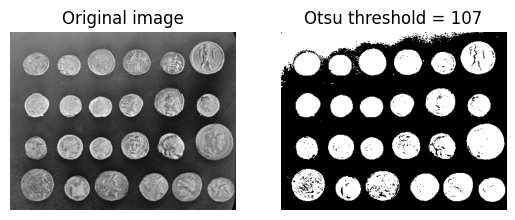

In [23]:
# Load the coins data
img = ski.data.coins()

# Get the otsu threshold
otsu_thresh = ski.filters.threshold_otsu(img)

# Otsu threshold the image
img_otsu = img > otsu_thresh

# Plot the images
fig, ax =  plt.subplots(1, 2)
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original image')
ax[1].imshow(img_otsu, cmap = 'gray')
ax[1].set_title('Otsu threshold = ' + str(otsu_thresh))
for a in ax:
    a.set_axis_off()

## Triangle thresholding

Triangle threshold is a bit more lenient than Otsu threshold, i.e, the triangle
threshold value is usually lower than the Otsu, and hence the thresholded image
contains more foreground pixels. 

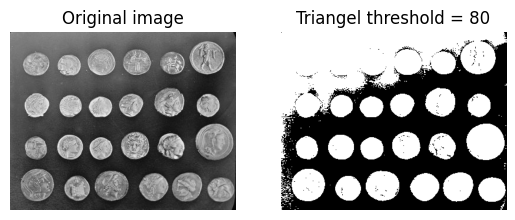

In [24]:
# Load the coins data
img = ski.data.coins()

# Get the triangle threshold
triangle_thresh = ski.filters.threshold_triangle(img)

# Triangel threshold the image
img_triangle = img > triangle_thresh


fig, ax =  plt.subplots(1, 2)
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original image')
ax[1].imshow(img_triangle, cmap = 'gray')
ax[1].set_title('Triangel threshold = ' + str(triangle_thresh))
for a in ax:
    a.set_axis_off()

# Picking the the "right" metric
While the Otsu and Triangle thresholding approaches are widely uses, there are
several other approach that are available as well. 

Picking the right metric really depends on your downstream application. If it
is important to retain as many foreground pixels as possible (that can later be
pruned, if necessary) then it is better to choose  a more lenient methods. On
the other hand, if we are concerned about getting as little background ad
possible, then it is better to choose a more conservative methods. When
designing an image analysis pipeline it is common to test several different
approaches prior to picking an optimal metric. 

As an example let us test these metrics on our cell images.

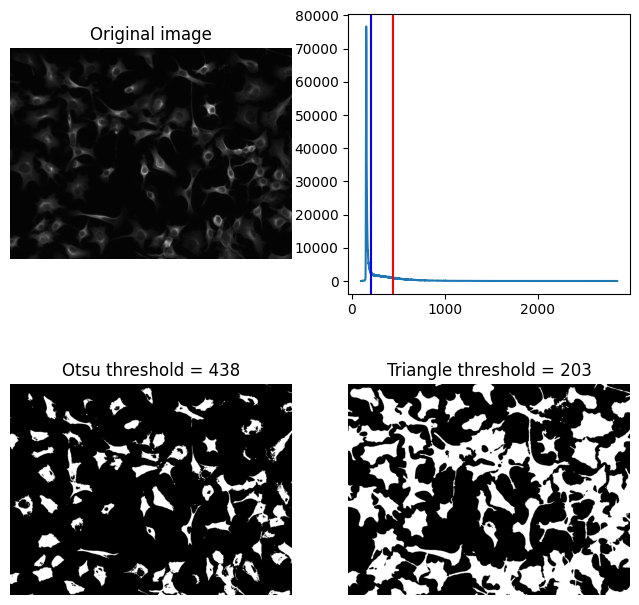

In [25]:
# Load the cell images
img = ski.io.imread("data/F01_202w1.TIF")

# Get the image histogram
hist, hist_centers = ski.exposure.histogram(img)

# Get the Otsu threshold
otsu_thresh = ski.filters.threshold_otsu(img)
# threshold the image
img_otsu = img > otsu_thresh

# Get the triangle threshold
triangle_thresh = ski.filters.threshold_triangle(img)
# threshold the image
img_triangle = img > triangle_thresh

# Plot the image
fig, ax =  plt.subplots(2, 2, figsize = (8, 8))
ax[0, 0].imshow(img, cmap = 'gray')
ax[0, 0].set_title('Original image')
ax[0, 0].set_axis_off()
ax[0, 1].plot(hist_centers, hist)
ax[0, 1].axvline(otsu_thresh, color='r')
ax[0, 1].axvline(triangle_thresh, color='b')
ax[1, 0].imshow(img_otsu, cmap = 'gray')
ax[1, 0].set_title('Otsu threshold = ' + str(otsu_thresh))
ax[1, 0].set_axis_off()
ax[1, 1].imshow(img_triangle, cmap = 'gray')
ax[1, 1].set_title('Triangle threshold = ' + str(triangle_thresh))
ax[1, 1].set_axis_off()